In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

pt.rcParams["figure.figsize"] = (20,10)
pt.style.use(['dark_background'])

In [3]:
data = pd.read_csv("data/slump_test.data")
print(f"Length: {len(data)}")
data.head()

Length: 103


,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
def split_dataset(dataset, target, train_percent):
    random = np.random.randn(len(dataset))
    mask = random < np.percentile(random, train_percent * 100)
    
    train_x, test_x, train_y, test_y = dataset[mask], dataset[~mask], target[mask], target[~mask]
    return train_x, test_x, train_y, test_y

x = data[["Cement", "Water", "Compressive Strength (28-day)(Mpa)"]]
y = data[["SLUMP(cm)", "FLOW(cm)"]]

train_x, test_x, train_y, test_y = split_dataset(x, y, 0.7)
print(f"Train length: {len(train_x)}, test length: {len(test_x)}")
print(train_y.head())

Train length: 72, test length: 31
   SLUMP(cm)  FLOW(cm)
0       23.0      62.0
1        0.0      20.0
2        1.0      20.0
3        3.0      21.5
5       23.0      55.0


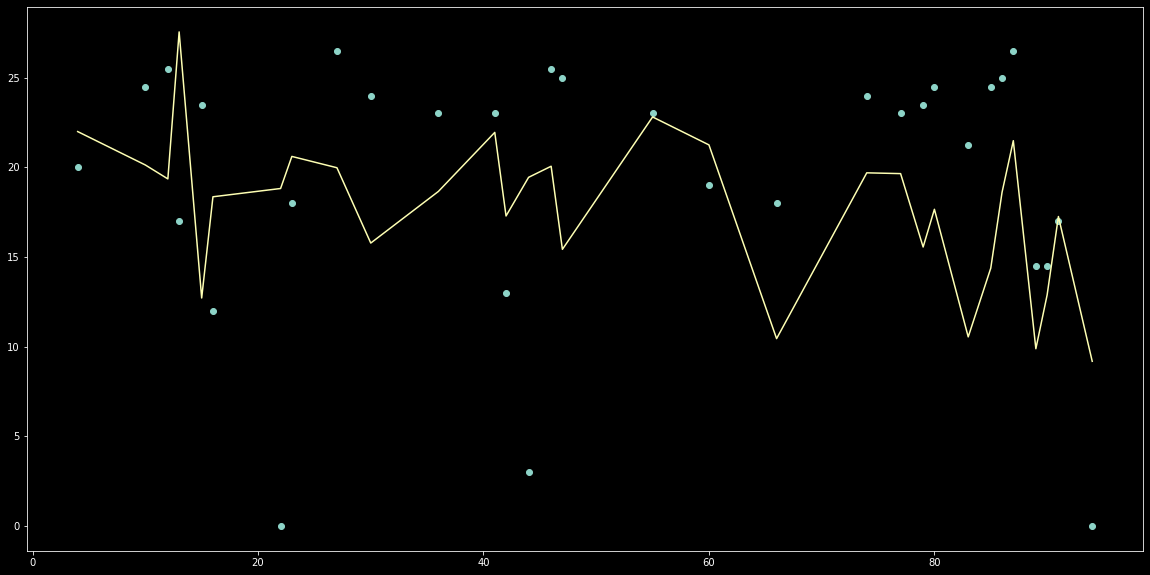

Mean squared error: 117.04
Coefficient of determination: 0.05


In [8]:
model = LinearRegression()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

pt.plot(test_x.index, test_y["SLUMP(cm)"], "o")
pt.plot(test_x.index, predictions[:,0])
pt.show()

print(f"Mean squared error: {round(mean_squared_error(test_y, predictions), 2)}")
print(f"Coefficient of determination: {round(r2_score(test_y, predictions), 2)}")

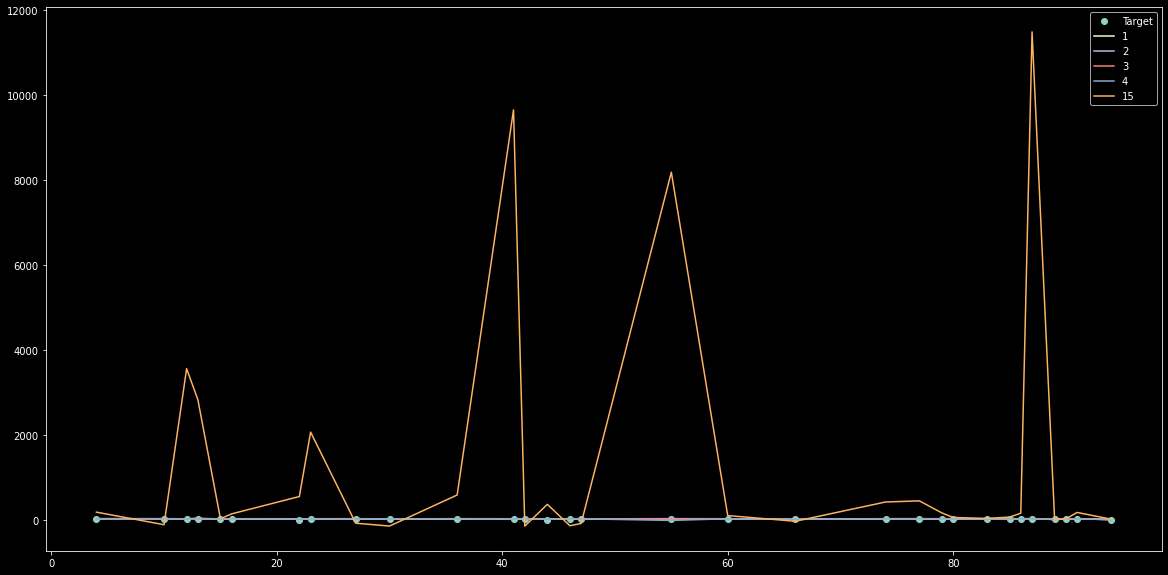

   degree          score         error
0       1       0.051858  1.170408e+02
1       2       0.159609  9.958618e+01
2       3       0.243673  9.947682e+01
3       4      -0.739951  2.303621e+02
4      15 -128059.750791  1.205628e+07


In [10]:
degrees = [1, 2, 3, 4]
scores = []
errors = []

pt.plot(test_x.index, test_y["SLUMP(cm)"], "o")

for i, degree in enumerate(degrees):
    features = PolynomialFeatures(degree, include_bias=False)
    model = LinearRegression()
    pipeline = Pipeline([("Features", features), ("Regression model", model)])
    pipeline.fit(train_x, train_y)
    
    prediction = pipeline.predict(test_x)
    scores.append(r2_score(test_y, prediction))
    errors.append(mean_squared_error(test_y, prediction))
    pt.plot(test_x.index, prediction[:,0])
    
pt.legend(["Target", *degrees])
pt.show()    

result = pd.DataFrame({"degree": degrees, "score": scores, "error": errors})
print(result)

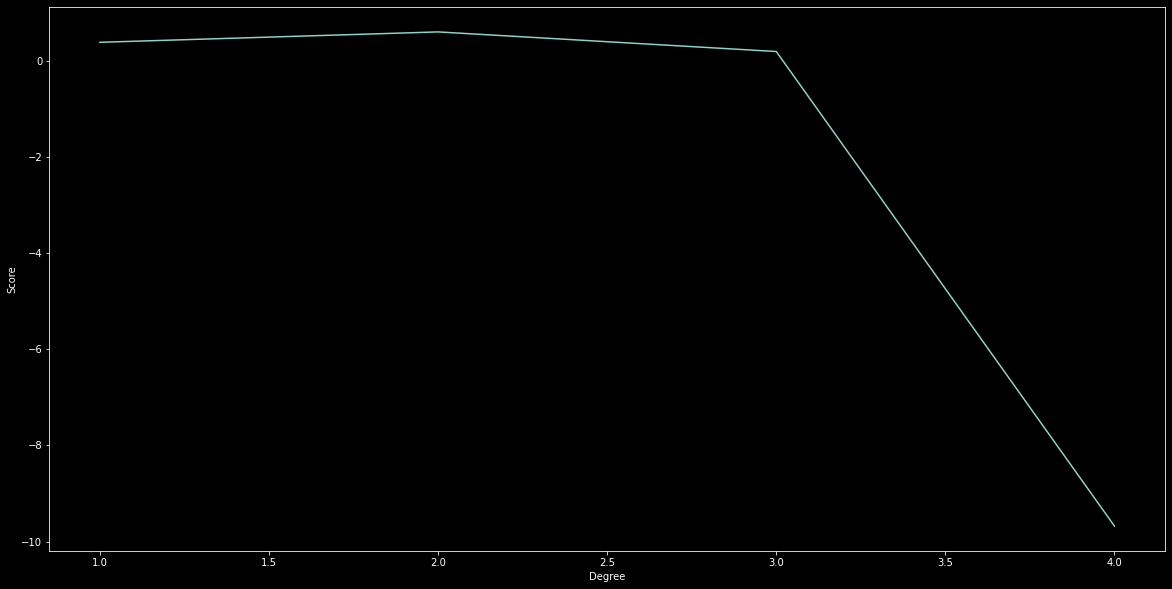

In [6]:
pt.plot(result["degree"], result["score"])
pt.xlabel("Degree")
pt.ylabel("Score")
pt.show()

In [7]:
lambdas = [-8, 0.0001, 0.01, 0.05]
scores = []
errors = []

for l in lambdas:
    features = PolynomialFeatures(2, include_bias=False)
    model = Ridge(alpha=l)
    pipeline = Pipeline([("Features", features), ("Regression model", model)])
    pipeline.fit(train_x, train_y)
    
    prediction = pipeline.predict(test_x)
    scores.append(r2_score(test_y, prediction))
    errors.append(mean_squared_error(test_y, prediction))  

result = pd.DataFrame({"lambda": lambdas, "score": scores, "error": errors})
print(result)

   lambda     score      error
0 -8.0000  0.472188  94.392172
1  0.0001  0.596044  71.270880
2  0.0100  0.596073  71.265676
3  0.0500  0.596189  71.244785


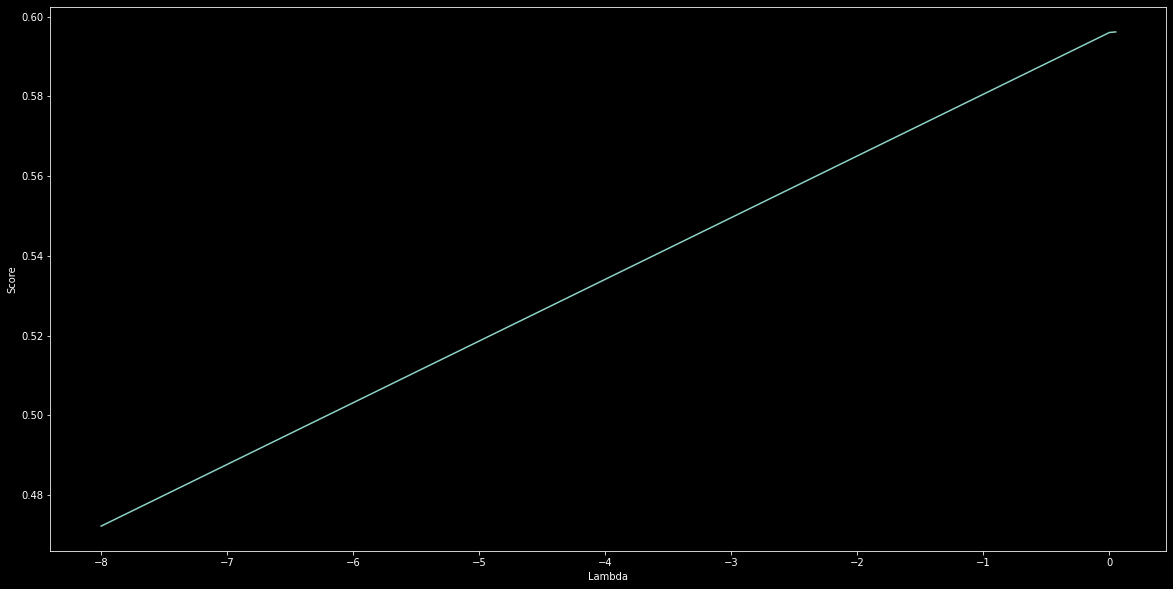

In [8]:
pt.plot(result["lambda"], result["score"])
pt.xlabel("Lambda")
pt.ylabel("Score")
pt.show()

In [9]:
lambdas = [-0.8, 0.0001 , 0.01, 0.05, 1]
scores = []
errors = []

for l in lambdas:
    features = PolynomialFeatures(2, include_bias=False)
    model = Lasso(alpha=l, max_iter=10000)
    pipeline = Pipeline([("Features", features), ("Regression model", model)])
    pipeline.fit(train_x, train_y)
    
    prediction = pipeline.predict(test_x)
    scores.append(r2_score(test_y, prediction))
    errors.append(mean_squared_error(test_y, prediction))  

result = pd.DataFrame({"lambda": lambdas, "score": scores, "error": errors})
print(result)

   lambda     score      error
0 -0.8000  0.544622  77.631742
1  0.0001  0.596048  71.270121
2  0.0100  0.596390  71.191388
3  0.0500  0.597765  70.882621
4  1.0000  0.609156  69.098455


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6060.893984812235, tolerance: 0.5095061631944444
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23417.882509866027, tolerance: 2.2162579861111116
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284.0124737808674, tolerance: 0.5095061631944444
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objectiv

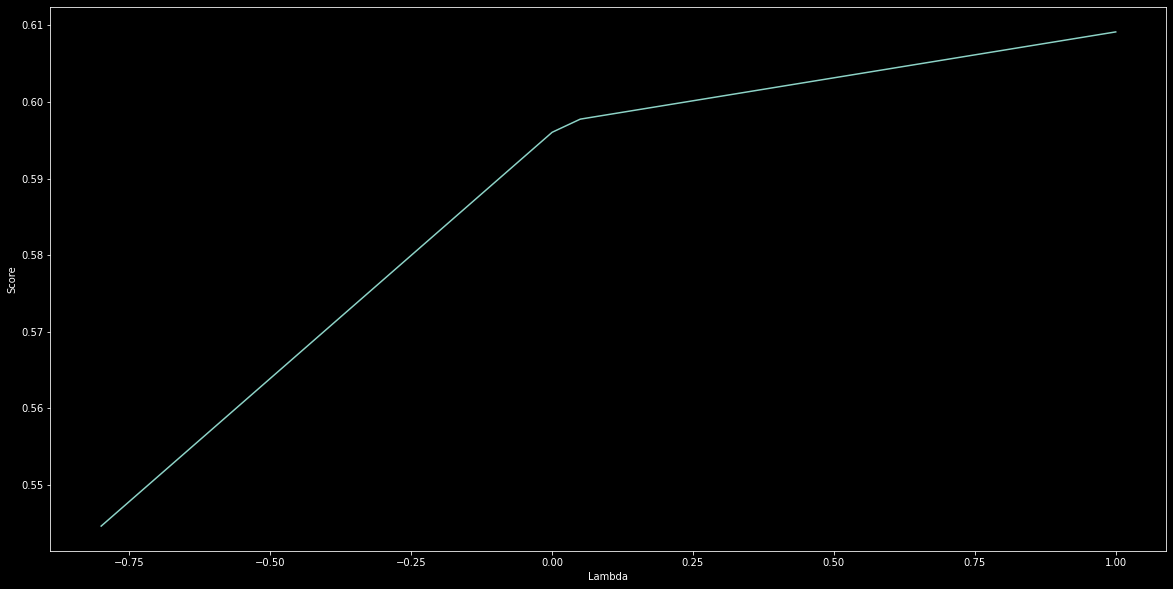

In [10]:
pt.plot(result["lambda"], result["score"])
pt.xlabel("Lambda")
pt.ylabel("Score")
pt.show()